## Impact of the parameters: Source

Here is studied a more realistic case:
* z=0.1
* source spectrum is generated assuming a powerlaw spectrum (between Emin=1MeV and Emax=100TeV): $\Gamma =1.2$
* EGMF (turbulent magnetic field): 1E-15 Gauss, L_B= 1 Mpc
* EBL model: Dominguez

This part shows the impact on spectrum if we play with the different parameters.

#### Emax
* if Emax < Ecut (10TeV) => Ecut = Emax
* else no impact

### Impact of the redshift

Five redshifts:

* z=0.04$\sim 175$Mpc,
* z=0.14$\sim 599$Mpc, 
* z=0.4$\sim 1.6$Gpc,
* z=1$\sim 3.4$Gpc,
* z=2$\sim 5.3$Gpc.

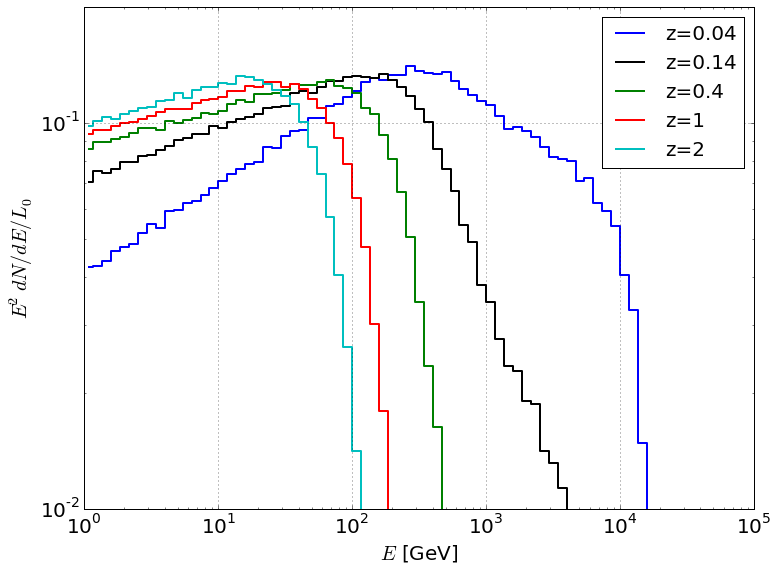

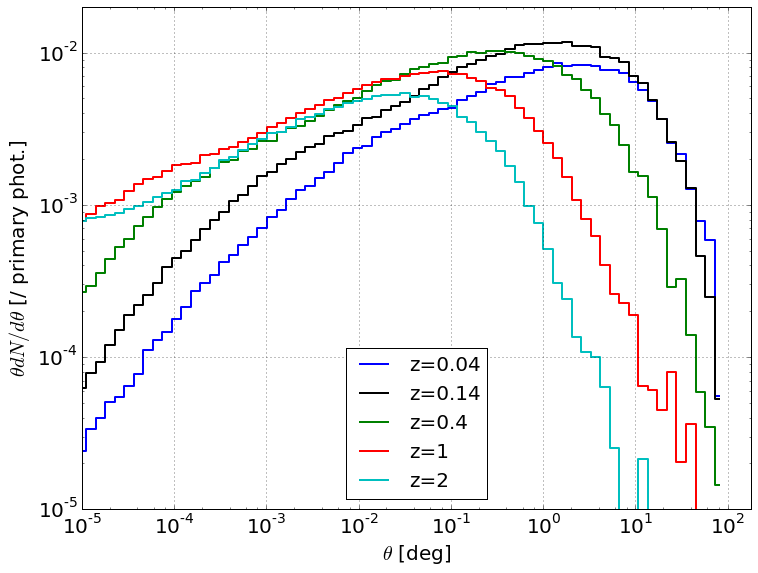

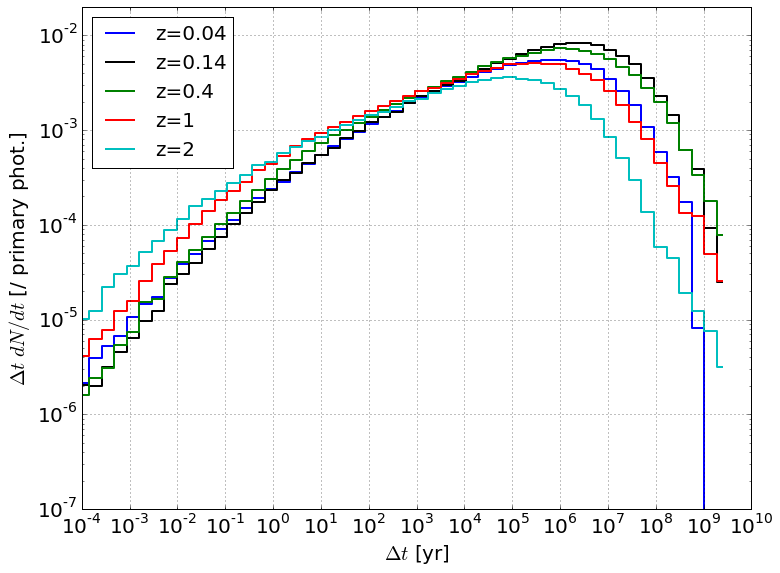

In [4]:
%matplotlib inline
import src.distribution
simus  = ["z=0.04","z=0.14","z=0.4","z=1","z=2"]
colors = ['b','k','g','r','c','m','y']
src.distribution.drawSpectrum(simus,colors=colors,yrange=[1e-2,2e-1])
src.distribution.drawArrivalAngle(simus,colors=colors,yrange=[1e-5,2e-2])
src.distribution.drawTiming(simus,colors=colors,yrange=[1e-7,2e-2])

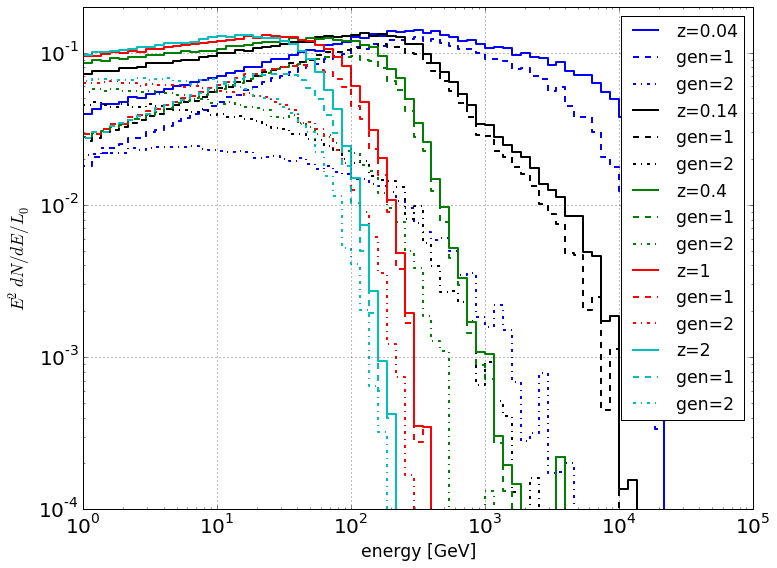

In [4]:
%matplotlib inline
import src.distribution
src.distribution.drawSpectrum(["z=0.04","z=0.14","z=0.4","z=1","z=2"],colors=['b','k','g','r','c','m','y'],yrange=[1e-4,2e-1],plot="generation")

The observed spectrum of a source is affected by its distance. 

As expected, the cut-off energy decreases with increasing distance. At high redshift, we find that
the absorption depth goes simply as $\tau_{\gamma\gamma}\propto E^2$ producing a superexponential
cutoff $\propto e^{-E^2/E_{\rm cut}^2}$. However the spectra of nearby sources show a more complex
and harder absorption cutoff. In our reference setup, the maximal energy of primary photons is
large (100 TeV), meaning efficient absorption. As a result, almost all spectra are dominated by
second-generation photons with index $\Gamma_2 = 1.8$ (see Eq. \ref{eq:highgen_index} with
$\Gamma_0=1.2$). Only the source at $z=0.04$ is close enough and the absorption weak enough to
quench the second-generation population. Hence, this source shows a harder, first-generation
dominated spectrum with index $\Gamma_1=1.6$.

### Mean arrival angle vs redshift

gen 2 dominating for redshift > 0.4

**computed in "Impact parameters - Extragalactic medium"**

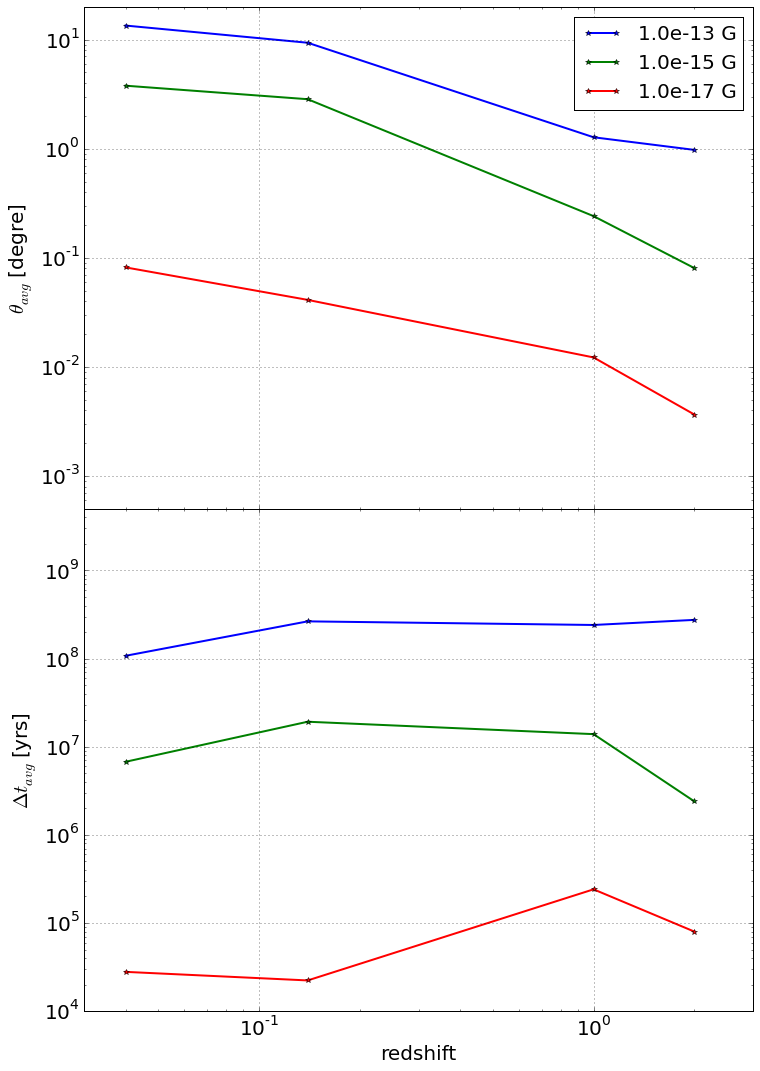

In [5]:
%matplotlib inline
from matplotlib.pyplot import figure, show, setp
from matplotlib import gridspec, rcParams
from numpy import zeros, loadtxt, size

label_size = 20
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size 

fig1 = figure(figsize=(12,18))
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1,1]) 
fig1.subplots_adjust(hspace=0)
ax11 = fig1.add_subplot(gs1[0])
ax12 = fig1.add_subplot(gs1[1],sharex=ax11)
#ax13 = fig1.add_subplot(gs1[2],sharex=ax11)

ratio_gen  = loadtxt("Results/ratio_gen_EGMF.dat")
theta_mean = loadtxt("Results/theta_mean_vs_EGMF.dat")
dt_mean    = loadtxt("Results/delay_mean_vs_EGMF.dat")

Redshifts = ratio_gen[1:,0]
B         = ratio_gen[0,1:]
ratio     = zeros(size(Redshifts))

for Bi in [2,4,6]:
   ax11.plot(Redshifts,theta_mean[1:,Bi],'-*',linewidth=2,label="%1.1e G"%B[Bi-1])
   ax12.plot(Redshifts,dt_mean[1:,Bi]   ,'-*',linewidth=2)
   #ax13.plot(Redshifts,ratio_gen[1:,Bi],'--*',linewidth=2)

ax11.set_xscale('log')   
ax11.set_yscale('log')
ax11.set_ylim([5e-4,2e1])
ax11.grid(b=True,which='major')
ax11.legend(loc="best",fontsize=label_size)
ax11.set_ylabel("$\\theta_{avg}$ [degre]",fontsize=label_size)
xticklabels = ax11.get_xticklabels()
setp(xticklabels, visible=False)

ax12.set_xscale('log')   
ax12.set_yscale('log')
ax12.set_ylim([1e4,5e9])
ax12.grid(b=True,which='major')

ax12.set_ylabel("$\\Delta t_{avg}$ [yrs]",fontsize=label_size)
#xticklabels = ax12.get_xticklabels()
#setp(xticklabels, visible=False)
ax12.set_xlim([3e-2,3])
ax12.set_xlabel("redshift",fontsize=label_size)

#ax13.set_xscale('log')   
#ax13.set_ylim([0.1,0.38])
#ax13.grid(b=True,which='major')
#ax13.set_xlabel("redshift",fontsize=label_size)
#ax13.set_ylabel("ratio gen 2 / gen 1",fontsize=label_size)

show()

### Intrinsic spectrum and $E_{max}$

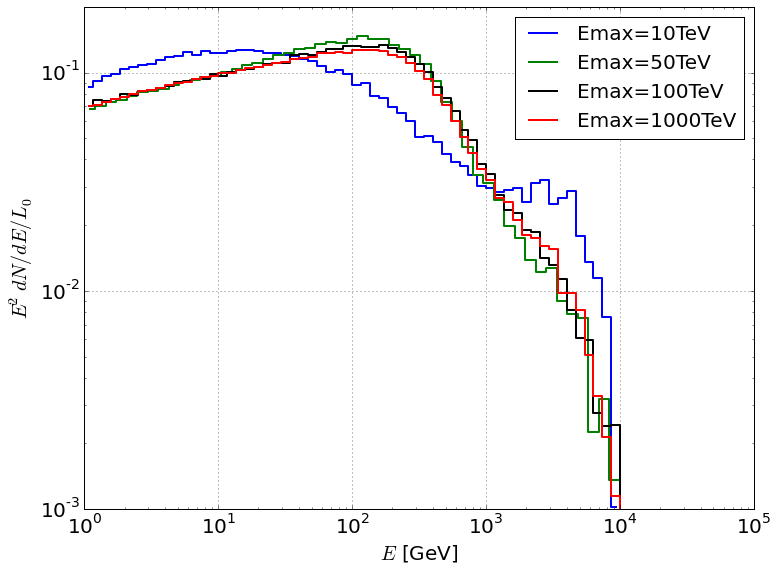

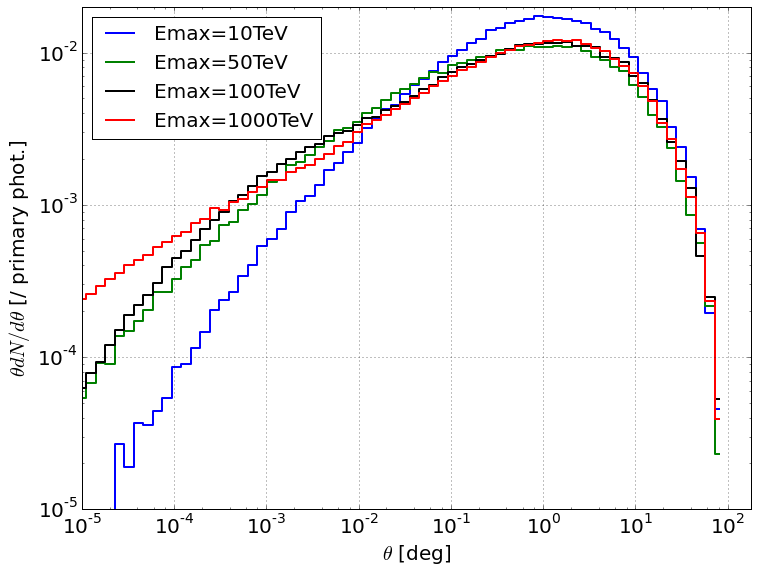

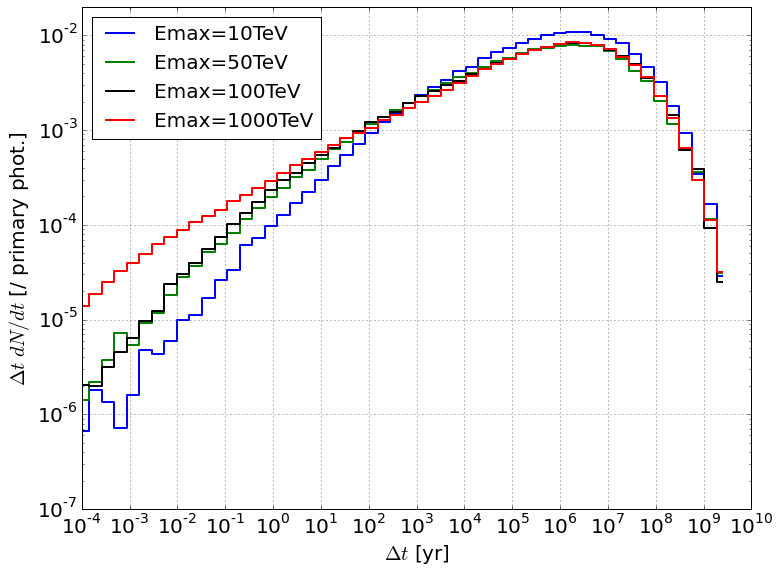

In [6]:
%matplotlib inline
import src.distribution
simus  = ["Emax=10TeV","Emax=50TeV","Emax=100TeV","Emax=1000TeV"]
colors = ['b','g','k','r','c','m','y']
src.distribution.drawSpectrum(simus,colors=colors,yrange=[1e-3,2e-1])
src.distribution.drawArrivalAngle(simus,colors=colors,yrange=[1e-5,2e-2])
src.distribution.drawTiming(simus,colors=colors,yrange=[1e-7,2e-2])

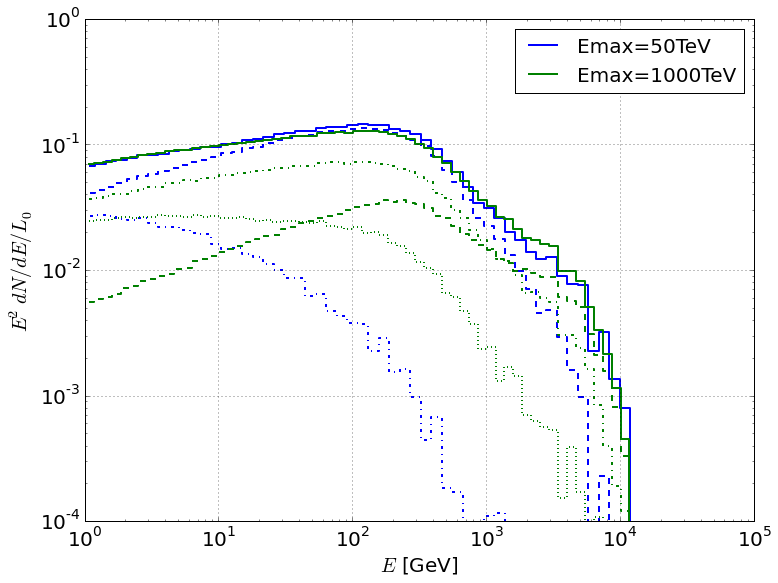

In [2]:
%matplotlib inline
import src.distribution
src.distribution.drawSpectrum(["Emax=50TeV","Emax=1000TeV"],plot="generation",colors=['b','g','k','r','c','m','y'])

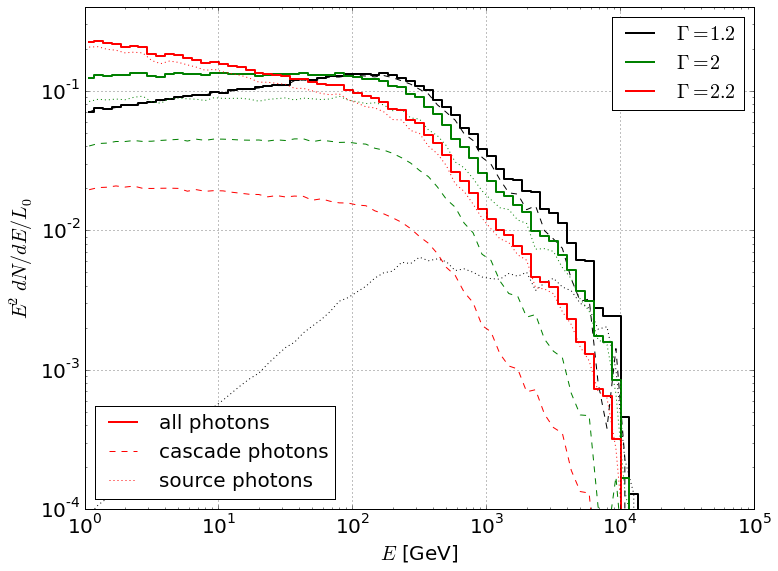

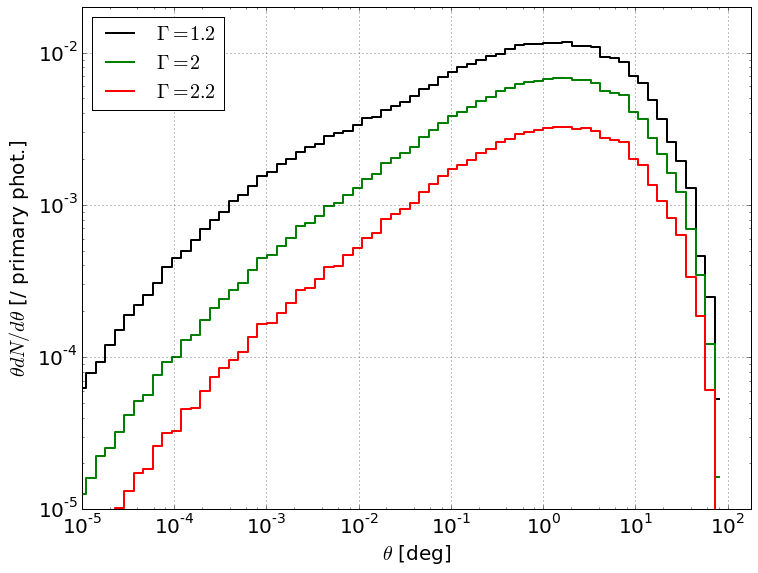

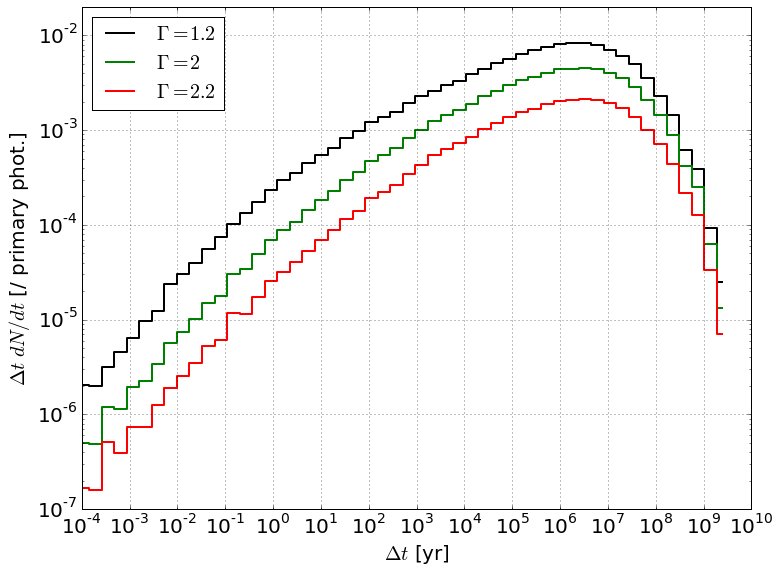

In [7]:
%matplotlib inline
import src.distribution
simus  = ["Gamma=1.2","Gamma=2","Gamma=2.2"]
colors = ['k','g','r','c','m','y']
src.distribution.drawSpectrum(simus,colors=colors,yrange=[1e-4,4e-1],plot="cascade contribution")
src.distribution.drawArrivalAngle(simus,colors=colors,yrange=[1e-5,2e-2])
src.distribution.drawTiming(simus,colors=colors,yrange=[1e-7,2e-2])

In [3]:
#%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import *

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

ax = figure(figsize=(12,9)).add_subplot(111)
Emin = 0.1
Emax = 1e5
N = 100000

def spectrum(E,w,Nb=100):
   dN,Ei = histogram(log10(E),Nb,weights=w)
   Ei=10**Ei
   Es = (Ei[1:Nb+1]+Ei[0:Nb])/2
   dE = Ei[1:Nb+1]-Ei[0:Nb]
   print sum(dN)/(N*log(Emax/Emin))
   return Es, dN/dE
   
def compute_weight(E,powerlaw_index):
   w = E**(1-powerlaw_index) / N * log(Emax/Emin) 
   if powerlaw_index == 2:
      w /= log(Emax/Emin)
   else:
      w *= (2-powerlaw_index)/(Emax**(2-powerlaw_index)-Emin**(2-powerlaw_index))
   return w


E = Emin*(Emax/Emin)**random.rand(N)

Es,dNdE = spectrum(E,ones(N))
ax.plot(Es,Es**2 *dNdE/(N*log(Emax/Emin)),drawstyle='steps-mid',color='k',label="simu spectrum")

w = compute_weight(E,powerlaw_index=1)
Es,dNdE = spectrum(E,w)
ax.plot(Es,Es**2 *dNdE,drawstyle='steps-mid',color='b',label="$\\Gamma = 1$")

w = compute_weight(E,powerlaw_index=1.5)
Es,dNdE = spectrum(E,w)
ax.plot(Es,Es**2 *dNdE,drawstyle='steps-mid',color='g',label="$\\Gamma = 1.5$")

w = compute_weight(E,powerlaw_index=2)
Es,dNdE = spectrum(E,w)
ax.plot(Es,Es**2 *dNdE,drawstyle='steps-mid',color='r',label="$\\Gamma = 2$")

w = compute_weight(E,powerlaw_index=2.2)
Es,dNdE = spectrum(E,w)
ax.plot(Es,Es**2 *dNdE,drawstyle='steps-mid',color='m',label="$\\Gamma = 2.2$")

ax.legend(loc="best",fontsize='xx-large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(b=True,which='major')
ax.set_xlabel("energy [GeV]",fontsize='xx-large')
ax.set_ylabel("$E^2 dN/dE / L_0$",fontsize='xx-large')
show()

0.0723824136505
1.000001e-10
7.23838789438e-09
5.22719651006e-07
1.28326913508e-06


### Considering BL Lacertae$^*$ blazar  spectrum

mean spectrum found in Sanchez 2013 (A&A): Evidence for a cosmological effect in γ-ray spectra of BL Lacertae

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: invalid value encountered in multiply


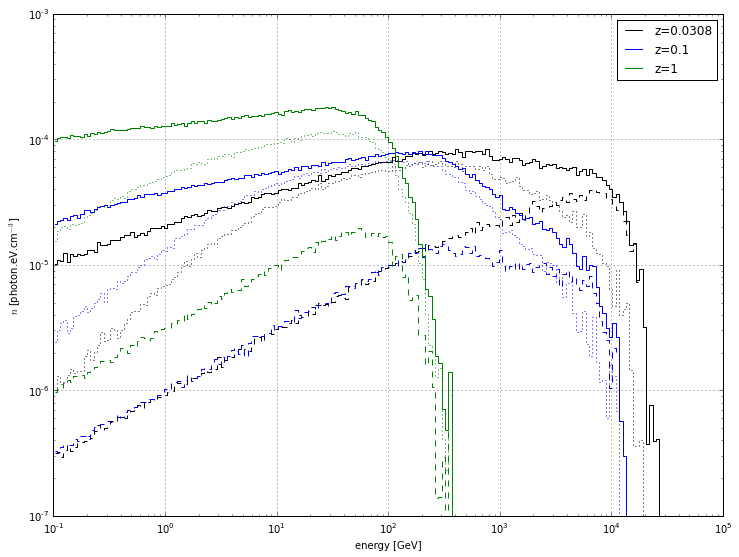

In [8]:
%matplotlib inline
from  matplotlib.pyplot import figure, show
from numpy import arange, select
from modules.read import ReadSpectrum, ReadSourceSpectrum, ReadProfile

ax = figure(figsize=(12,9)).add_subplot(111)
colors=['k','b','g','r','c','m','y']
i=0
for fileId in ["z=0.0308","z=0.1","z=1"]:
   ener,dNdE,dNdE0,dNdE1,dNdE2 = ReadSpectrum(fileId,[0,1,5,6,7])
   z=ReadProfile(fileId,[3])
   p = ax.plot(ener,ener**2 *dNdE*(1+z),drawstyle='steps-mid',color=colors[i],label=fileId)
   ax.plot(ener,ener**2 *(dNdE1+dNdE2)*(1+z),color=p[0].get_color(),drawstyle='steps-mid',linestyle=':')
   ax.plot(ener,ener**2 *dNdE0*(1+z),color=p[0].get_color(),drawstyle='steps-mid',linestyle='--')        
    
   Es,Fs = ReadSourceSpectrum(fileId,[0,1])
   Fs *= dNdE[0]/Fs[0]
   #ax.plot(Es,Es**2*Fs*(1+z),color=p[0].get_color(),linestyle='-')
        
   i+=1

   ax.legend(loc="best")
   ax.set_xscale('log')
   ax.set_yscale('log')
   ax.grid(b=True,which='major')
   ax.set_ylabel("$E^2 dN/dE$ [GeV]")
   ax.set_xlabel("energy [GeV]")

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(b=True,which='major')
ax.set_xlabel("energy [GeV]")
ax.set_ylabel("$n$ [photon.eV.cm$^{-3}$]")
show()
